In [2]:
import numpy
import matplotlib.pyplot as plt

(array([9227., 7239., 7081., 7076., 7174., 7104., 7209., 7305., 7258.,
        4740., 6943., 6639., 5753., 4433., 2617., 1291.,  580.,  236.,
          77.,   18.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ,
        31.9, 34.8, 37.7, 40.6, 43.5, 46.4, 49.3, 52.2, 55.1, 58. ]),
 <BarContainer object of 20 artists>)

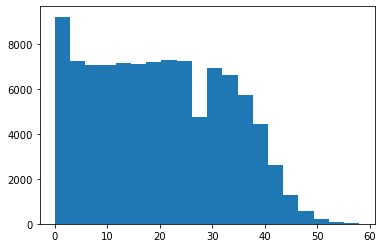

In [4]:
size=21

def moleStep(currentMoleIndex):
    if currentMoleIndex==0:
        nextMoleIndex = 1
    elif currentMoleIndex==size-1:
        nextMoleIndex = size-2
    else:
        if numpy.random.rand()<0.5:
            nextMoleIndex = currentMoleIndex + 1
        else:
            nextMoleIndex = currentMoleIndex - 1
    return nextMoleIndex


class whacker:
  def __init__(self):
    self.index = numpy.random.randint(size)
    self.dir = numpy.random.randint(2)*2-1
    self.pauseBit=0

  def step(self):
    if self.index==0:
        if self.pauseBit==0:
            self.pauseBit=1
        else:
            self.index = 1
            self.dir = 1
            self.pauseBit=0
    elif self.index==size-1:
        if self.pauseBit==0:
            self.pauseBit=1
        else:
            self.index = size-2
            self.dir = -1
            self.pauseBit=0
    else:
        if self.dir>0:
            self.index = self.index + 1
        else:
            self.index = self.index - 1
    return self.index



def doExperiment():
    mole = numpy.random.randint(size)
    whac = whacker()

    #print("iter = -1   mole = ", mole, "  whac = ", whac.index, "  difference = ", whac.index-mole)

    for iter in range(100):
        newMole = moleStep(mole)
        newWhac = whac.step()
        if newWhac==newMole:
            #print("Mole is whached at iter ", iter,".  Whack hit at ", newWhac, " while mole was in ", newMole)
            return iter
        else:
            #print("iter = ", iter, "  newMole = ", newMole, "  newWhac = ", newWhac, "  difference = ", newWhac-newMole)
            pass
        mole = newMole


results = []

for experiment in range(100000):
    newWhac = doExperiment()
    results.append( newWhac )

plt.hist(results, bins=size-1)